In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Loading 

In [2]:
from sklearn.model_selection import train_test_split

# Load the dataset 
data = pd.read_csv('processed_data_Encoding.csv')

# Separate features and target
X = data.drop('y', axis=1) 
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Check the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (36168, 49)
X_test shape: (9042, 49)


somte

In [3]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X_train, y_train)

scaling

In [4]:
from sklearn.preprocessing import StandardScaler

# Apply scaling only to the specified numerical columns
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(x_smote)
X_test_scaled = scaler.transform(X_test)


Random Forest - Training Accuracy: 0.9362567246340548
Random Forest - Test Accuracy: 0.8776819287768193
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7949
           1       0.49      0.39      0.43      1093

    accuracy                           0.88      9042
   macro avg       0.71      0.67      0.68      9042
weighted avg       0.87      0.88      0.87      9042



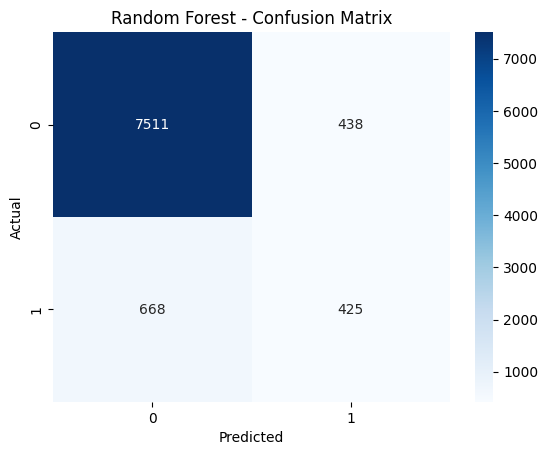

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
# rf_model = RandomForestClassifier(random_state=42)

rf_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=20, 
    min_samples_split=10, 
    min_samples_leaf=4, 
    class_weight='balanced',
    random_state=42
)

# rf_model = RandomForestClassifier(
#     n_estimators=100, 
#     max_depth=15, 
#     min_samples_split=10, 
#     min_samples_leaf=2, 
#     class_weight='balanced',
#     random_state=42
# )

# { 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2,
#   'n_estimators': 200}

# Train the model on the resampled data
rf_model.fit(X_train_scaled, y_smote)

# Make predictions
rf_y_pred_train = rf_model.predict(X_train_scaled)
rf_y_pred_test = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest - Training Accuracy:", accuracy_score(y_smote, rf_y_pred_train))
print("Random Forest - Test Accuracy:", accuracy_score(y_test, rf_y_pred_test))
# # Evaluate
# print("Random Forest - Training Accuracy:", accuracy_score(y_smote, rf_y_pred_train))
# print("Random Forest - Test Accuracy:", accuracy_score(y_test, rf_y_pred_test))

# Classification Report
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_y_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [6]:
# Get predicted probabilities for the positive class
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.7902445795514567


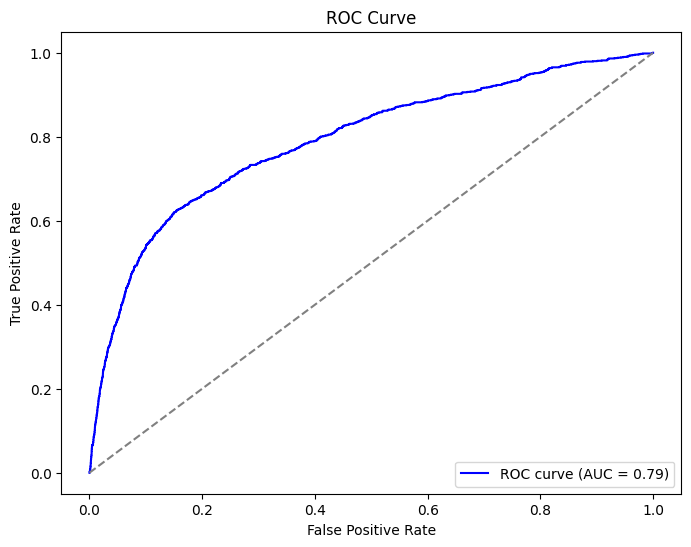

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Get ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
